<a href="https://colab.research.google.com/github/Reshma-2895/CODSOFT/blob/main/Spam_SMS_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.preprocessing import LabelEncoder
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from textblob import TextBlob

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/uciml/sms-spam-collection-dataset/versions/1


In [ ]:
import pandas as pd

# Try different encodings, such as 'latin-1' or 'ISO-8859-1'
df = pd.read_csv('archive.zip', encoding='latin-1')
# or
# df = pd.read_csv('archive.zip', encoding='ISO-8859-1')

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape



(5572, 5)

In [ ]:

df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
missing_data = df.isnull().sum()
missing_data

,0
label,0
message,0


In [ ]:
duplicates = df.duplicated().sum()
duplicates

403

In [ ]:
df[df.duplicated(keep='first')].head()

,label,message
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls


In [ ]:
df = df.drop_duplicates(keep='first')

# Confirm the new shape after removing duplicates
df.shape, df.head()

((5169, 2),
   label                                            message
 0   ham  Go until jurong point, crazy.. Available only ...
 1   ham                      Ok lar... Joking wif u oni...
 2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
 3   ham  U dun say so early hor... U c already then say...
 4   ham  Nah I don't think he goes to usf, he lives aro...)

In [ ]:
df.duplicated().sum()


0

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv('archive.zip', encoding='latin-1')

# Assuming the message column is named 'v2', change it if necessary
message_column_name = 'v2'  # Replace with the actual column name if it's different

# Map target column (v1: 'spam' -> 1, 'ham' -> 0)
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = text.split()  # Tokenize text
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(tokens)

# Apply preprocessing to the messages using the correct column name
df['cleaned_message'] = df[message_column_name].apply(preprocess_text)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_message'])  # Transform cleaned messages into numerical format
y = df['v1']  # Target labels are in 'v1' column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, shuffle data

# Initialize the model
model = MultinomialNB()

# Perform cross-validation and get scores
# Use X and y directly, not df['cleaned_message']
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Train the model on the entire dataset (after validation)
model.fit(X, y)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cross-validation scores: [0.97219731 0.97309417 0.96947935 0.97396768 0.96499102]
Accuracy: 0.9721973094170404
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



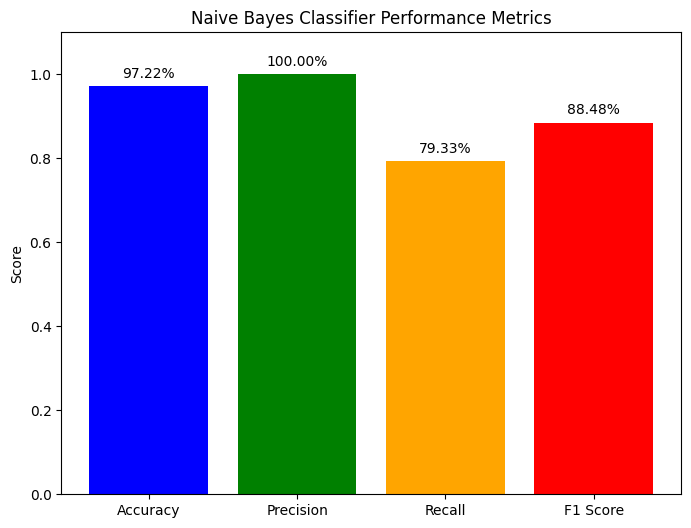

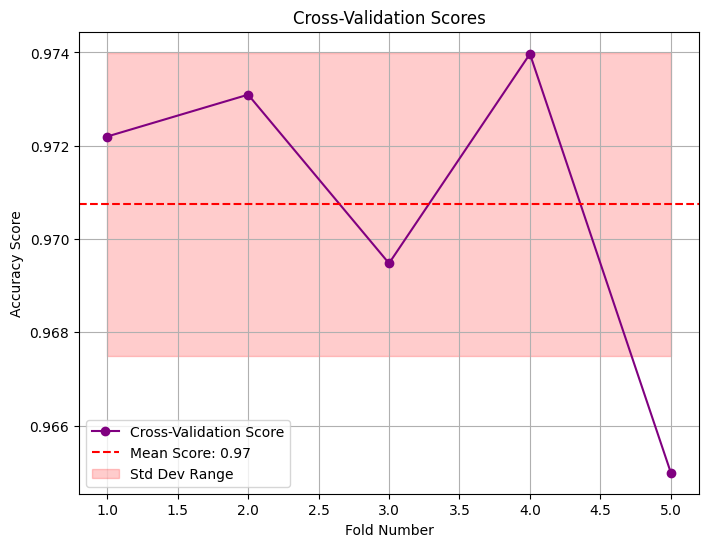

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# 1. Calculate Metrics
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision, Recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

# Cross-validation scores (already computed earlier)
cv_scores_mean = scores.mean()
cv_scores_std = scores.std()

# 2. Bar Plot for Accuracy, Precision, Recall, and F1-Score with Percentage Labels
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1.1)  # Set y-axis range
plt.title('Naive Bayes Classifier Performance Metrics')
plt.ylabel('Score')

# Add percentage labels on top of bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
             f'{value * 100:.2f}%', ha='center', fontsize=10, color='black')

plt.show()

# 3. Line Plot for Cross-Validation Scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='purple', label='Cross-Validation Score')
plt.axhline(y=cv_scores_mean, color='red', linestyle='--', label=f'Mean Score: {cv_scores_mean:.2f}')
plt.fill_between(range(1, len(scores) + 1),
                 cv_scores_mean - cv_scores_std,
                 cv_scores_mean + cv_scores_std,
                 color='red', alpha=0.2, label='Std Dev Range')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid()
plt.show()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.9721973094170404
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



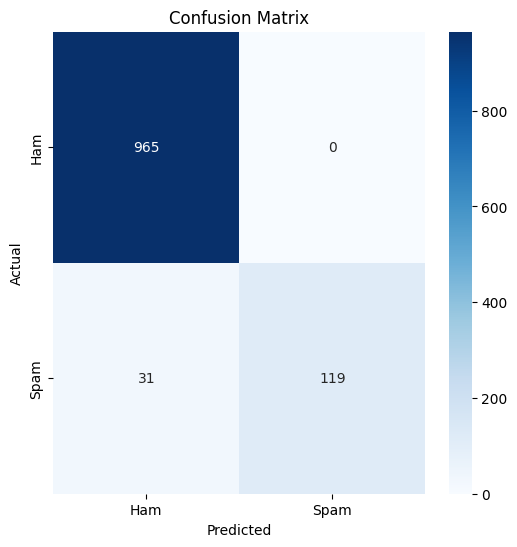

Cross-validation scores: [0.97219731 0.97309417 0.96947935 0.97396768 0.96499102]
Mean cross-validation accuracy: 0.970745908172384


In [ ]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv('archive.zip', encoding='latin-1')

# Assuming the message column is named 'v2', adjust if necessary
message_column_name = 'v2'  # Replace with the actual column name if it's different

# Map target column (v1: 'spam' -> 1, 'ham' -> 0)
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = text.split()  # Tokenize text
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(tokens)

# Apply preprocessing to the messages using the correct column name
df['cleaned_message'] = df[message_column_name].apply(preprocess_text)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_message'])  # Transform cleaned messages into numerical format
y = df['v1']  # Target labels are in 'v1' column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes model
model = MultinomialNB()

# Train the model on the training set
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Draw confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation accuracy:", cross_val_scores.mean())


In [ ]:
import pandas as pd
import zipfile
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

# Download NLTK stopwords if not already done
nltk.download('stopwords')

# Unzip the archive.zip file
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

# Load the dataset (update path if needed)
df = pd.read_csv('archive.zip', encoding='latin-1')

# Rename columns for clarity (assuming v1 = label, v2 = message)
df=df[['v1','v2']]
df.columns = ['label', 'message']

# Map target labels to binary values (spam -> 1, ham -> 0)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize the text
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    # Stem the words
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]
    return ' '.join(words)

# Apply preprocessing to the message column
df['cleaned_message'] = df['message'].apply(preprocess_text)

# Split the dataset into training and testing sets
X = df['cleaned_message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.9802690582959641

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:
 [[965   0]
 [ 22 128]]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.9802690582959641

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



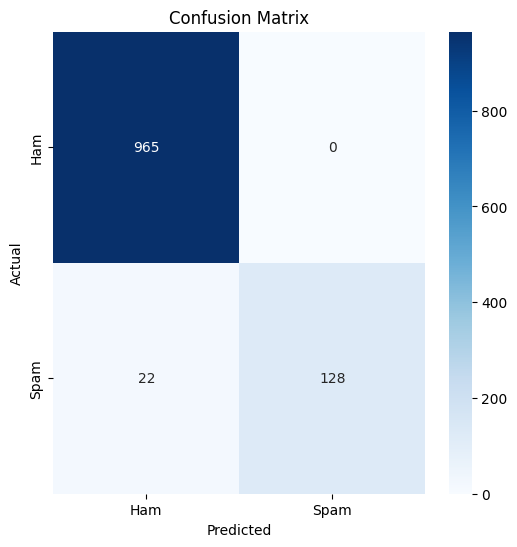

Cross-validation scores: [0.98026906 0.98654709 0.98653501 0.97576302 0.97396768]
Mean cross-validation accuracy: 0.9806163705307904


In [ ]:
import pandas as pd
import zipfile
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

# Download NLTK stopwords if not already done
nltk.download('stopwords')

# Unzip the archive.zip file
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

# Load the dataset (update path if needed)
df = pd.read_csv('dataset/spam.csv', encoding='latin-1')

# Rename columns for clarity (assuming v1 = label, v2 = message)
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Map target labels to binary values (spam -> 1, ham -> 0)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize the text
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    # Stem the words
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]
    return ' '.join(words)

# Apply preprocessing to the message column
df['cleaned_message'] = df['message'].apply(preprocess_text)

# Split the dataset into training and testing sets
X = df['cleaned_message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Draw confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model, vectorizer.transform(X), y, cv=kf, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation accuracy:", cross_val_scores.mean())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.9802690582959641

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:
 [[965   0]
 [ 22 128]]


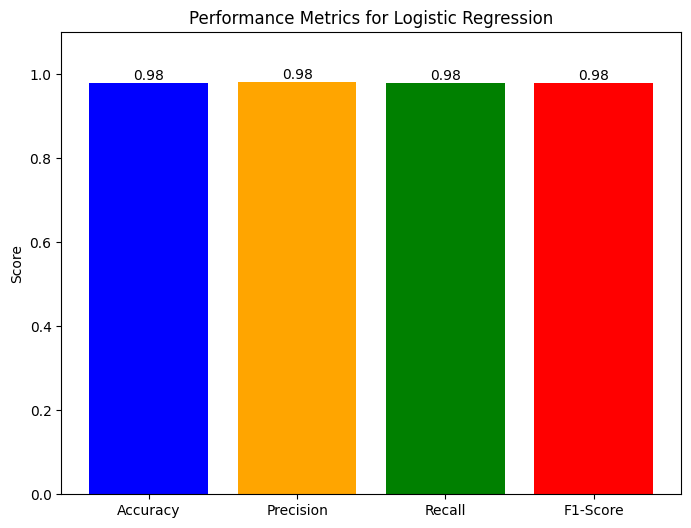

In [ ]:
import pandas as pd
import zipfile
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
import matplotlib.pyplot as plt
import numpy as np

# Download NLTK stopwords if not already done
nltk.download('stopwords')

# Unzip the archive.zip file
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

# Load the dataset (update path if needed)
df = pd.read_csv('archive.zip', encoding='latin-1')

# Rename columns for clarity (assuming v1 = label, v2 = message)
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Map target labels to binary values (spam -> 1, ham -> 0)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize the text
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    # Stem the words
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]
    return ' '.join(words)

# Apply preprocessing to the message column
df['cleaned_message'] = df['message'].apply(preprocess_text)

# Split the dataset into training and testing sets
X = df['cleaned_message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall, and F1-score for spam and ham (binary classification)
precision = report["weighted avg"]["precision"]
recall = report["weighted avg"]["recall"]
f1_score = report["weighted avg"]["f1-score"]

# Print metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot bar graph for metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1_score]

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1.1)  # Ensure y-axis limits are clear
plt.title("Performance Metrics for Logistic Regression")
plt.ylabel("Score")

# Annotate bars with metric values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f"{height:.2f}", ha='center', va='bottom')

plt.show()


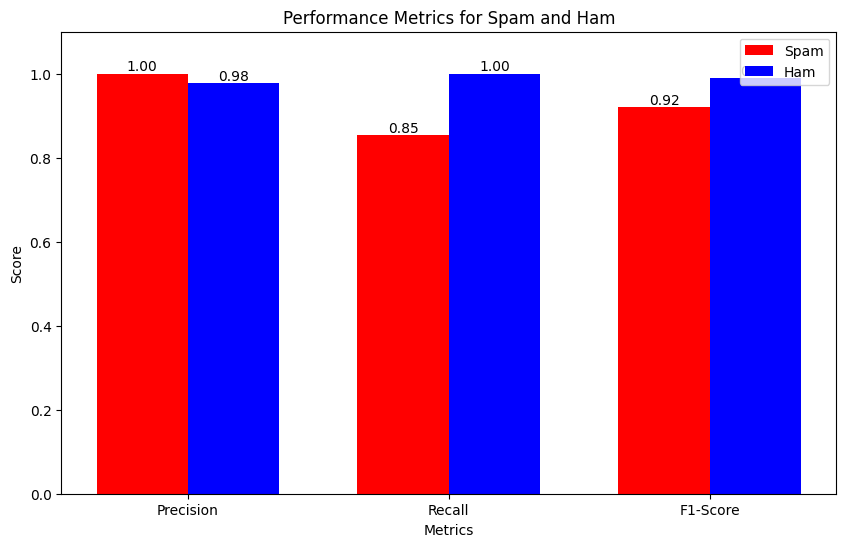

In [ ]:
# Extract precision, recall, and F1-score for each class
spam_metrics = report["1"]  # Metrics for 'spam'
ham_metrics = report["0"]   # Metrics for 'ham'

# Extract metrics for the bar graph
metrics = ['Precision', 'Recall', 'F1-Score']
spam_values = [spam_metrics["precision"], spam_metrics["recall"], spam_metrics["f1-score"]]
ham_values = [ham_metrics["precision"], ham_metrics["recall"], ham_metrics["f1-score"]]

# Plot bar graph
x = np.arange(len(metrics))  # Label locations
width = 0.35  # Width of the bars

plt.figure(figsize=(10, 6))
spam_bars = plt.bar(x - width/2, spam_values, width, label='Spam', color='red')
ham_bars = plt.bar(x + width/2, ham_values, width, label='Ham', color='blue')

# Add labels, title, and legend
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Performance Metrics for Spam and Ham")
plt.xticks(x, metrics)
plt.ylim(0, 1.1)
plt.legend()

# Annotate bars with values
for bar_group in [spam_bars, ham_bars]:
    for bar in bar_group:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f"{height:.2f}", ha='center', va='bottom')

plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-1-3ef4ea2452bd>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map({'ham': 0, 'spam': 1})


Accuracy: 0.9748878923766816

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.85      0.90       150

    accuracy                           0.97      1115
   macro avg       0.97      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115


Confusion Matrix:
 [[960   5]
 [ 23 127]]


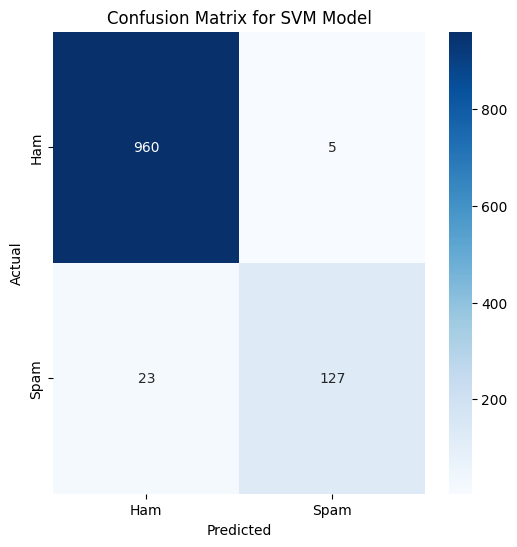

In [ ]:
import pandas as pd
import zipfile
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK stopwords if not already done
nltk.download('stopwords')

# Unzip the archive.zip file
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

# Load the dataset (update path if needed)
df = pd.read_csv('dataset/spam.csv', encoding='latin-1')

# Rename columns for clarity (assuming v1 = label, v2 = message)
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Map target labels to binary values (spam -> 1, ham -> 0)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize the text
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    # Stem the words
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]
    return ' '.join(words)

# Apply preprocessing to the message column
df['cleaned_message'] = df['message'].apply(preprocess_text)

# Split the dataset into training and testing sets
X = df['cleaned_message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


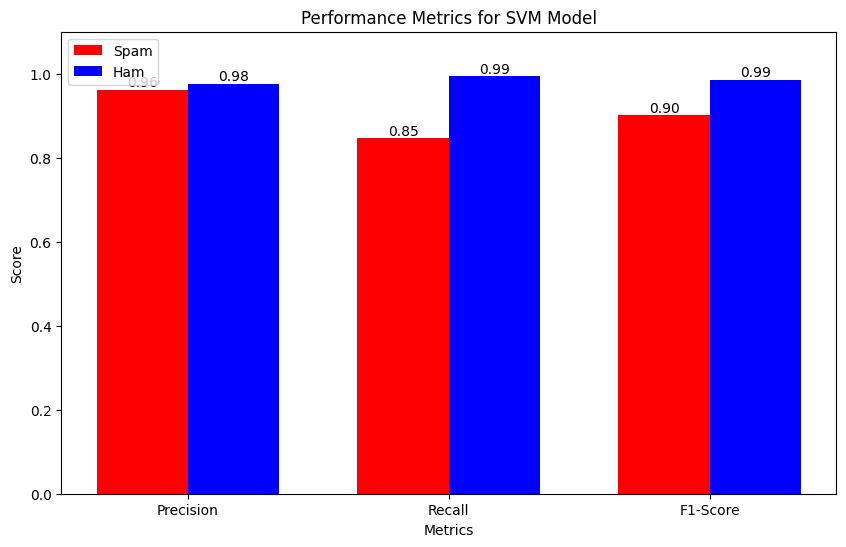

Accuracy: 0.9748878923766816


In [ ]:
import pandas as pd
import zipfile
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Download NLTK stopwords if not already done
nltk.download('stopwords')

# Unzip the archive.zip file
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

# Load the dataset (update path if needed)
df = pd.read_csv('dataset/spam.csv', encoding='latin-1')

# Rename columns for clarity (assuming v1 = label, v2 = message)
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Map target labels to binary values (spam -> 1, ham -> 0)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize the text
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    # Stem the words
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]
    return ' '.join(words)

# Apply preprocessing to the message column
df['cleaned_message'] = df['message'].apply(preprocess_text)

# Split the dataset into training and testing sets
X = df['cleaned_message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall, and F1-score for each class
precision_spam = report["1"]["precision"]
recall_spam = report["1"]["recall"]
f1_score_spam = report["1"]["f1-score"]
precision_ham = report["0"]["precision"]
recall_ham = report["0"]["recall"]
f1_score_ham = report["0"]["f1-score"]

# Plot bar graph for spam and ham metrics
metrics = ['Precision', 'Recall', 'F1-Score']
spam_values = [precision_spam, recall_spam, f1_score_spam]
ham_values = [precision_ham, recall_ham, f1_score_ham]

x = np.arange(len(metrics))  # Label locations
width = 0.35  # Width of the bars

plt.figure(figsize=(10, 6))
spam_bars = plt.bar(x - width/2, spam_values, width, label='Spam', color='red')
ham_bars = plt.bar(x + width/2, ham_values, width, label='Ham', color='blue')

# Add labels, title, and legend
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Performance Metrics for SVM Model")
plt.xticks(x, metrics)
plt.ylim(0, 1.1)
plt.legend()

# Annotate bars with values
for bar_group in [spam_bars, ham_bars]:
    for bar in bar_group:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f"{height:.2f}", ha='center', va='bottom')

plt.show()

# Print overall accuracy
print("Accuracy:", accuracy)
